<a href="https://colab.research.google.com/github/CrisGiacomazzi/Burn_Project/blob/main/StudyBurn_OpenDataStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

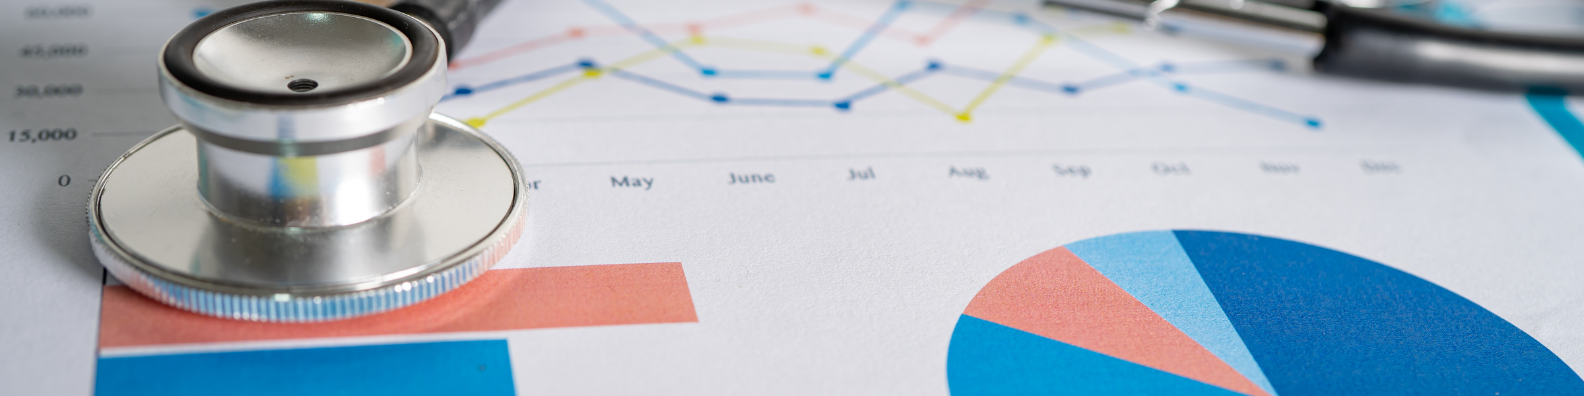

#**Burn patient in South Brazil: a Descriptive Analysis with open database of 10 years (2013-2023)**

##Cristiane Mecca Giacomazzi (Data Analyst)




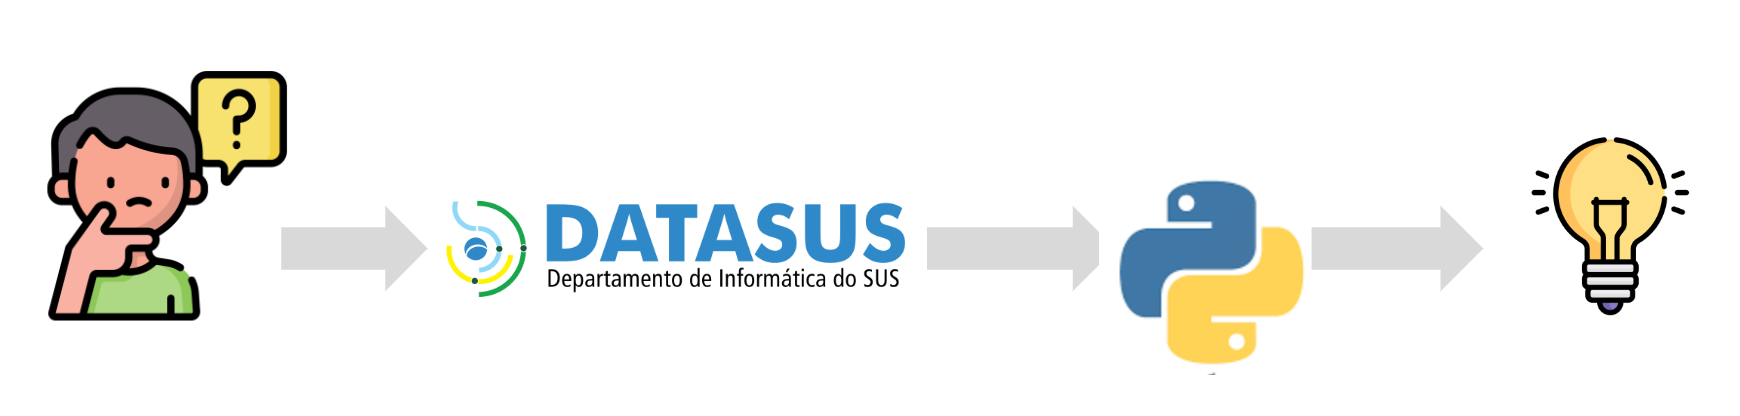

#**4) Dictionary**



In [214]:
from IPython.display import HTML

In [215]:
import pandas as pd

# Creating a DataFrame with columns "Variable", "Type", and "Meaning"
data = {
    'Variable': ['Ano', 'Regiao', 'df_sexo','df_int','g1_causa','g1_obito','tm_int','tm_all'],
    'Type': ['object', 'object', 'object', 'float64/int64', 'float64','float64/int64', 'float64','float64'],
    'Meaning': ['Year of research', 'Health region(COSEMS-RS)','Male and Female','Source of admission','Sourse of admission by cause','Number of deaths','Average time for admission by group','Average time admission total'],
}

df = pd.DataFrame(data)

df_dictionary = (
    df.style
    .hide_index()
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', 'lightgray'), ('color', 'black')]},
        {'selector': 'tbody td', 'props': [('background-color', 'whitesmoke'), ('color', 'black')]},
        {'selector': 'tbody tr:hover td', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
        {'selector': 'caption', 'props': [('caption-side', 'bottom')]}
])
)

df_dictionary


<ipython-input-215-9f5fc0fd192e>:14: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()


Variable,Type,Meaning
Ano,object,Year of research
Regiao,object,Health region(COSEMS-RS)
df_sexo,object,Male and Female
df_int,float64/int64,Source of admission
g1_causa,float64,Sourse of admission by cause
g1_obito,float64/int64,Number of deaths
tm_int,float64,Average time for admission by group
tm_all,float64,Average time admission total


#**5) Analysis**


---


Libraries used:
* Pandas - software library written for the Python programming language for data manipulation and analysis
* Matplotlib - plotting library for the Python programming language and its numerical mathematics extension NumPy.
* Numpy - library for the Python programming language and high-level mathematical functions.

In [216]:
!pip install -q pandas==1.5.3
!pip install -q matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ERROR: Operation cancelled by user


In [217]:
pd.__version__

'1.5.3'

In [218]:
df_sexo = pd.read_csv('/content/df_sexo.csv')

In [219]:
df_sexo.shape

(11, 3)

In [220]:
df_sexo

,Data,Feminino,Masculino
0,2013-01-01,1.362,2.815
1,2014-01-01,1.426,2.738
2,2015-01-01,1.496,2.927
3,2016-01-01,1.609,2.924
4,2017-01-01,1.709,3.234
5,2018-01-01,1.816,3.222
6,2019-01-01,2.315,3.727
7,2020-01-01,2.183,3.770
8,2021-01-01,2.247,3.815
9,2022-01-01,2.539,4.102


*Masculino = male; Feminino = female

In [221]:
df_sexo['Data'].min()

'2013-01-01'

In [222]:
df_sexo['Data'].max()

'2023-01-01'

In [223]:
df_sexo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Data       11 non-null     object 
 1   Feminino   11 non-null     float64
 2   Masculino  11 non-null     float64
dtypes: float64(2), object(1)
memory usage: 392.0+ bytes


In [224]:
df_sexo['Data']=pd.to_datetime(df_sexo['Data'])

In [225]:
df_sexo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       11 non-null     datetime64[ns]
 1   Feminino   11 non-null     float64       
 2   Masculino  11 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 392.0 bytes


In [226]:
print('Colunas         \t      Porcentagem')
(df_sexo.isnull().sum() / df_sexo.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


Data         0.0
Feminino     0.0
Masculino    0.0
dtype: float64

In [227]:
df_sexo.describe().round(2)

,Feminino,Masculino
count,11.00,11.00
mean,1.86,3.27
std,0.40,0.50
min,1.36,2.69
25%,1.55,2.87
50%,1.78,3.22
75%,2.22,3.75
max,2.54,4.10


*As we can see, the average (mean) and median have close values, however, the standard deviation is large, depicting the extensive variability of value along the years. Adictionally, we can confirm this variability in interquartile range.

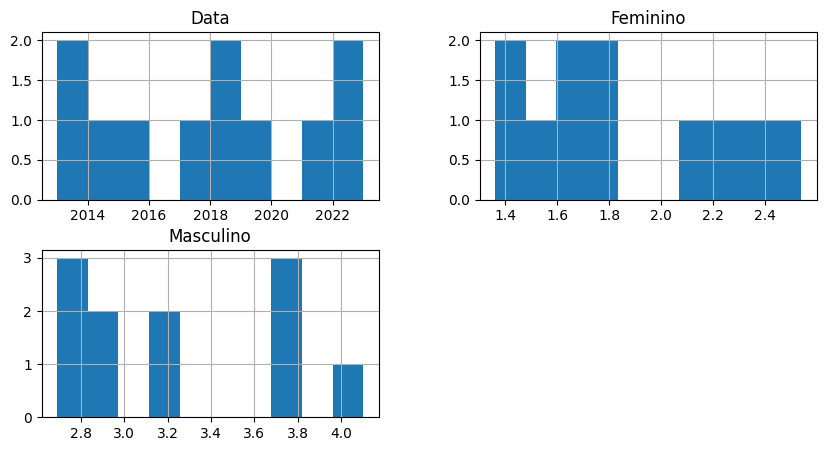

In [228]:
df_sexo.hist(figsize=(10,5));

*It is possible to see the assymetric behaviour of male and female variables.

In [229]:
temporal_serie = df_sexo.set_index('Data')[['Feminino','Masculino']]

In [230]:
temporal_serie = temporal_serie.asfreq('Y')

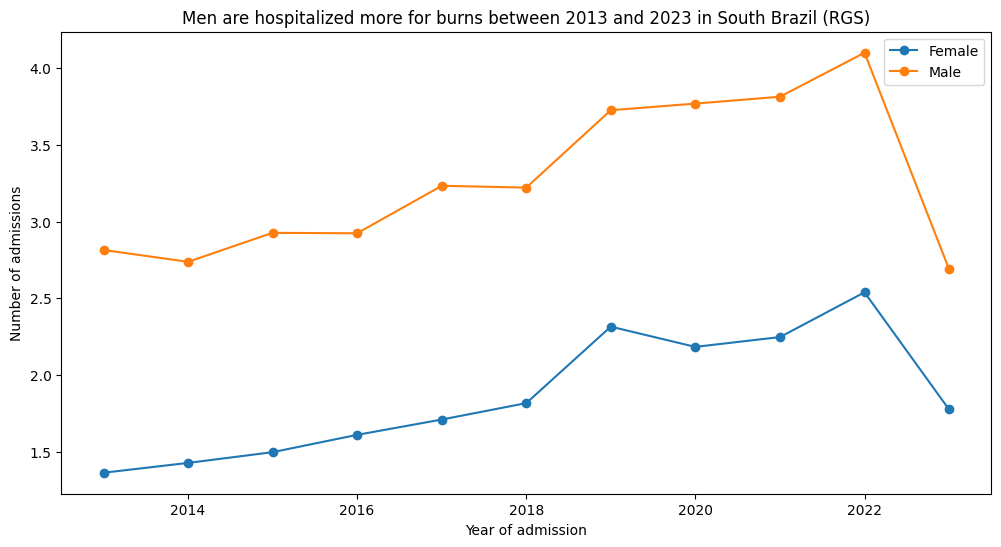

In [231]:
temporal_serie = df_sexo.set_index('Data')[['Feminino', 'Masculino']]
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(temporal_serie['Feminino'], marker='o', linestyle='-', label='Female')
plt.plot(temporal_serie['Masculino'], marker='o', linestyle='-', label='Male')

plt.title('Men are hospitalized more for burns between 2013 and 2023 in South Brazil (RGS)')
plt.xlabel('Year of admission')
plt.ylabel('Number of admissions')
plt.legend()
plt.grid(False)
plt.show()

*In this lineplot I highlight the increasing absolut frequency (or number of admissions) since 2013 to 2022, when there is a decrease.
*Remembering the data are avaiable untill August 2023 in DATASUS

In [232]:
df_int_brancos = pd.read_csv('/content/Int_Brancos_sih_cnv_firs141017189_6_236_14 (1) copy.csv')

In [233]:
df_int_brancos.shape

(11, 32)

In [234]:
df_int_brancos.head()

,Ano,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera/Costa Doce,...,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43024 regiao 24 Campos de Cima da Serra,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 JacuiCentro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,43030 regiao 30 Vale da Luz,Total
0,2013,1,30,7,1,583,2,1377,46,NaN,...,NaN,8,NaN,18,25.0,36,239,3,NaN,3219
1,2014,8,31,6,2,555,3,1236,363,NaN,...,1.0,5,NaN,27,14.0,16,280,5,NaN,3427
2,2015,3,17,5,3,362,3,1213,498,NaN,...,NaN,17,NaN,58,17.0,30,352,6,NaN,3692
3,2016,3,31,19,3,456,4,1265,427,NaN,...,1.0,14,NaN,62,21.0,17,355,9,NaN,3878
4,2017,8,41,5,4,462,7,1246,284,3.0,...,NaN,2,NaN,74,2.0,32,309,4,NaN,3837


In [235]:
df_int_brancos.tail()

,Ano,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera/Costa Doce,...,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43024 regiao 24 Campos de Cima da Serra,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 JacuiCentro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,43030 regiao 30 Vale da Luz,Total
6,2019,16,46,8,2,489,11,998,541,NaN,...,1.0,12,NaN,57,5.0,19,360,10,NaN,4675
7,2020,18,53,3,12,624,10,1004,531,NaN,...,NaN,22,NaN,54,NaN,22,347,30,2.0,4768
8,2021,20,34,3,32,786,8,1039,556,3.0,...,NaN,22,NaN,81,19.0,36,360,44,22.0,4891
9,2022,24,84,4,332,759,3,1071,600,1.0,...,NaN,13,1.0,86,5.0,32,431,73,3.0,5496
10,2023,10,174,2,90,571,14,584,434,6.0,...,1.0,11,2.0,43,4.0,19,251,56,12.0,3920


In [236]:
print('Colunas         \t      Porcentagem')
(df_int_brancos.isnull().sum() / df_int_brancos.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43024 regiao 24  Campos de Cima da Serra            81.82
43009 regiao 09  Carbonifera/Costa Doce             63.64
43030 regiao 30  Vale da Luz                        63.64
43022 regiao 22  Pampa                              54.55
43020 regiao 20  Rota da Producao                   36.36
43011 regiao 11  Sete Povos das Missoes             27.27
43019 regiao 19  Botucarai                          27.27
43018 regiao 18  Araucarias                          9.09
43026 regiao 26  Uva Vale                            9.09
43012 regiao 12  Portal das Missoes                  9.09
43016 regiao 16  Alto Uruguai Gaucho                 9.09
43025 regiao 25  Vinhedos e Basalto                  0.00
43023 regiao 23  Caxias e Hortensias                 0.00
43027 regiao 27  JacuiCentro                         0.00
43028 regiao 28  Vinte e Oito                        0.00
43021 regiao 21  Sul                                 0.00
43029 regiao 29  Vales e Montanhas                   0.00
Ano           

*It was decided do not remove missing values because I understand that there is no admissions in these cases.

In [237]:
df_int_brancos.dtypes

Ano                                                   int64
43001 regiao 01  Verdes Campos                        int64
43002 regiao 02  Entre Rios                           int64
43003 regiao 03  Fronteira Oeste                      int64
43004 regiao 04  Belas Praias                         int64
43005 regiao 05  Bons Ventos                          int64
43006 regiao 06  Vale do Paranhana e Costa Serra      int64
43007 regiao 07  Vale dos Sinos                       int64
43008 regiao 08  Vale do Cai e Metropolitana          int64
43009 regiao 09  Carbonifera/Costa Doce             float64
43010 regiao 10  Capital e Vale do Gravatai           int64
43011 regiao 11  Sete Povos das Missoes             float64
43012 regiao 12  Portal das Missoes                 float64
43013 regiao 13  Diversidade                          int64
43014 regiao 14  Fronteira Noroeste                   int64
43015 regiao 15  Caminho das Aguas                    int64
43016 regiao 16  Alto Uruguai Gaucho    

In [238]:
df_int_brancos.columns

Index(['Ano', '43001 regiao 01  Verdes Campos', '43002 regiao 02  Entre Rios',
       '43003 regiao 03  Fronteira Oeste', '43004 regiao 04  Belas Praias',
       '43005 regiao 05  Bons Ventos',
       '43006 regiao 06  Vale do Paranhana e Costa Serra',
       '43007 regiao 07  Vale dos Sinos',
       '43008 regiao 08  Vale do Cai e Metropolitana',
       '43009 regiao 09  Carbonifera/Costa Doce',
       '43010 regiao 10  Capital e Vale do Gravatai',
       '43011 regiao 11  Sete Povos das Missoes',
       '43012 regiao 12  Portal das Missoes', '43013 regiao 13  Diversidade',
       '43014 regiao 14  Fronteira Noroeste',
       '43015 regiao 15  Caminho das Aguas',
       '43016 regiao 16  Alto Uruguai Gaucho', '43017 regiao 17  Planalto',
       '43018 regiao 18  Araucarias', '43019 regiao 19  Botucarai',
       '43020 regiao 20  Rota da Producao', '43021 regiao 21  Sul',
       '43022 regiao 22  Pampa', '43023 regiao 23  Caxias e Hortensias',
       '43024 regiao 24  Campos de Cima da

In [239]:
df_int_brancos.describe().round(2)

,Ano,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera/Costa Doce,...,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43024 regiao 24 Campos de Cima da Serra,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 JacuiCentro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,43030 regiao 30 Vale da Luz,Total
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,4.00,...,5.0,11.00,2.00,11.00,10.00,11.00,11.00,11.00,4.00,11.00
mean,2018.00,11.09,54.09,6.73,44.27,556.64,6.27,1097.64,419.55,3.25,...,1.0,12.64,1.50,58.73,11.80,25.91,335.55,22.27,9.75,4158.82
std,3.32,7.56,43.52,4.94,99.00,129.25,4.00,212.22,159.07,2.06,...,0.0,6.27,0.71,22.73,8.34,7.63,60.38,24.77,9.32,698.86
min,2013.00,1.00,17.00,2.00,1.00,362.00,2.00,584.00,46.00,1.00,...,1.0,2.00,1.00,18.00,2.00,16.00,239.00,3.00,2.00,3219.00
25%,2015.50,5.50,31.00,3.50,2.50,469.00,3.00,1021.50,349.00,2.50,...,1.0,9.50,1.25,48.50,5.00,19.00,294.50,5.00,2.75,3764.50
50%,2018.00,10.00,41.00,5.00,4.00,555.00,4.00,1071.00,434.00,3.00,...,1.0,13.00,1.50,58.00,10.00,26.00,352.00,9.00,7.50,3920.00
75%,2020.50,17.00,53.50,7.50,22.00,603.50,9.00,1241.00,536.00,3.75,...,1.0,15.50,1.75,77.50,18.50,32.00,360.00,37.00,14.50,4721.50
max,2023.00,24.00,174.00,19.00,332.00,786.00,14.00,1377.00,600.00,6.00,...,1.0,22.00,2.00,86.00,25.00,36.00,431.00,73.00,22.00,5496.00


*The average (mean) and median have an extensive variability among health regions, like the standart deviation and median. Again depicts the huge variability of skin color (white) among health regions.

In [240]:
df_int_pp = pd.read_csv('/content/Int_PP_sih_cnv_firs142054189_6_236_14 copy.csv', sep =';')

In [241]:
df_int_pp.head()

,Ano processamento,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera/Costa Doce,...,43020 regiao 20 Rota da Producao,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
0,2013,1.0,2.0,3.0,NaN,15,1.0,50,NaN,NaN,...,NaN,4.0,NaN,3,NaN,5.0,7.0,13,NaN,238
1,2014,NaN,NaN,4.0,NaN,23,2.0,44,16.0,NaN,...,NaN,5.0,1.0,6,5.0,4.0,1.0,27,NaN,267
2,2015,NaN,1.0,3.0,1.0,15,NaN,49,34.0,NaN,...,NaN,1.0,NaN,6,5.0,9.0,2.0,26,NaN,296
3,2016,1.0,1.0,1.0,NaN,14,NaN,45,17.0,1.0,...,NaN,7.0,NaN,4,6.0,6.0,2.0,17,NaN,245
4,2017,1.0,1.0,NaN,1.0,55,NaN,39,27.0,NaN,...,NaN,2.0,NaN,3,3.0,5.0,2.0,19,NaN,447


In [242]:
df_int_pp.tail()

,Ano processamento,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera/Costa Doce,...,43020 regiao 20 Rota da Producao,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
6,2019,1.0,5.0,NaN,NaN,78,3.0,34,32.0,NaN,...,NaN,2.0,NaN,5,5.0,NaN,2.0,17,NaN,592
7,2020,NaN,5.0,NaN,1.0,67,1.0,43,32.0,NaN,...,NaN,1.0,NaN,4,6.0,1.0,3.0,24,1.0,512
8,2021,1.0,3.0,2.0,2.0,95,1.0,36,31.0,1.0,...,NaN,NaN,NaN,4,8.0,NaN,1.0,28,1.0,507
9,2022,1.0,4.0,1.0,24.0,85,1.0,31,42.0,NaN,...,NaN,1.0,NaN,2,9.0,NaN,1.0,40,3.0,540
10,2023,2.0,2.0,1.0,10.0,55,3.0,22,43.0,NaN,...,NaN,NaN,NaN,2,4.0,NaN,NaN,14,3.0,444


In [243]:
print('Colunas         \t      Porcentagem')
(df_int_pp.isnull().sum() / df_int_pp.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43011 regiao 11  Sete Povos das Missoes             90.91
43022 regiao 22  Pampa                              90.91
43020 regiao 20  Rota da Producao                   90.91
43019 regiao 19  Botucarai                          90.91
43016 regiao 16  Alto Uruguai Gaucho                90.91
43009 regiao 09  Carbonifera/Costa Doce             81.82
43017 regiao 17  Planalto                           72.73
43013 regiao 13  Diversidade                        72.73
43012 regiao 12  Portal das Missoes                 63.64
43029 regiao 29  Vales e Montanhas                  63.64
43014 regiao 14  Fronteira Noroeste                 63.64
43026 regiao 26  Uva Vale                           45.45
43004 regiao 04  Belas Praias                       45.45
43001 regiao 01  Verdes Campos                      27.27
43006 regiao 06  Vale do Paranhana e Costa Serra    27.27
43003 regiao 03  Fronteira Oeste                    27.27
43018 regiao 18  Araucarias                         18.18
43021 regiao 2

*It was decided do not remove missing values because I understand that there is no admissions in these cases.

In [244]:
df_int_pp.dtypes

Ano processamento                                     int64
43001 regiao 01  Verdes Campos                      float64
43002 regiao 02  Entre Rios                         float64
43003 regiao 03  Fronteira Oeste                    float64
43004 regiao 04  Belas Praias                       float64
43005 regiao 05  Bons Ventos                          int64
43006 regiao 06  Vale do Paranhana e Costa Serra    float64
43007 regiao 07  Vale dos Sinos                       int64
43008 regiao 08  Vale do Cai e Metropolitana        float64
43009 regiao 09  Carbonifera/Costa Doce             float64
43010 regiao 10  Capital e Vale do Gravatai           int64
43011 regiao 11  Sete Povos das Missoes             float64
43012 regiao 12  Portal das Missoes                 float64
43013 regiao 13  Diversidade                        float64
43014 regiao 14  Fronteira Noroeste                 float64
43015 regiao 15  Caminho das Aguas                    int64
43016 regiao 16  Alto Uruguai Gaucho    

In [245]:
df_int_pp.describe().round(2)

,Ano processamento,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera/Costa Doce,...,43020 regiao 20 Rota da Producao,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
count,11.00,8.00,10.00,8.00,6.00,11.00,8.00,11.00,10.00,2.0,...,1.0,9.00,1.0,11.00,10.00,6.00,10.00,11.00,4.00,11.00
mean,2018.00,1.12,2.60,2.12,6.50,51.36,1.88,38.09,29.50,1.0,...,1.0,2.89,1.0,3.64,5.40,5.00,2.40,21.00,2.00,412.73
std,3.32,0.35,1.58,1.13,9.27,29.99,0.99,9.19,9.37,0.0,...,NaN,2.09,NaN,1.63,1.96,2.61,1.78,9.24,1.15,128.18
min,2013.00,1.00,1.00,1.00,1.00,14.00,1.00,22.00,16.00,1.0,...,1.0,1.00,1.0,1.00,3.00,1.00,1.00,6.00,1.00,238.00
25%,2015.50,1.00,1.25,1.00,1.00,19.00,1.00,32.50,22.50,1.0,...,1.0,1.00,1.0,2.50,4.25,4.25,1.25,15.50,1.00,281.50
50%,2018.00,1.00,2.00,2.00,1.50,55.00,1.50,39.00,31.50,1.0,...,1.0,2.00,1.0,4.00,5.00,5.00,2.00,19.00,2.00,447.00
75%,2020.50,1.00,3.75,3.00,8.00,72.50,3.00,44.50,33.50,1.0,...,1.0,4.00,1.0,4.50,6.00,5.75,2.75,26.50,3.00,509.50
max,2023.00,2.00,5.00,4.00,24.00,95.00,3.00,50.00,43.00,1.0,...,1.0,7.00,1.0,6.00,9.00,9.00,7.00,40.00,3.00,592.00


*The averages (mean) and medians varied less between health regions, as did standard deviations and medians, demonstrating the variation in values of a variable (in this case, black and brown skin color) between regions. However, the variable is much smaller than in white skin color.

In [246]:
df_int_brancos.columns

Index(['Ano', '43001 regiao 01  Verdes Campos', '43002 regiao 02  Entre Rios',
       '43003 regiao 03  Fronteira Oeste', '43004 regiao 04  Belas Praias',
       '43005 regiao 05  Bons Ventos',
       '43006 regiao 06  Vale do Paranhana e Costa Serra',
       '43007 regiao 07  Vale dos Sinos',
       '43008 regiao 08  Vale do Cai e Metropolitana',
       '43009 regiao 09  Carbonifera/Costa Doce',
       '43010 regiao 10  Capital e Vale do Gravatai',
       '43011 regiao 11  Sete Povos das Missoes',
       '43012 regiao 12  Portal das Missoes', '43013 regiao 13  Diversidade',
       '43014 regiao 14  Fronteira Noroeste',
       '43015 regiao 15  Caminho das Aguas',
       '43016 regiao 16  Alto Uruguai Gaucho', '43017 regiao 17  Planalto',
       '43018 regiao 18  Araucarias', '43019 regiao 19  Botucarai',
       '43020 regiao 20  Rota da Producao', '43021 regiao 21  Sul',
       '43022 regiao 22  Pampa', '43023 regiao 23  Caxias e Hortensias',
       '43024 regiao 24  Campos de Cima da

<Figure size 1200x600 with 0 Axes>

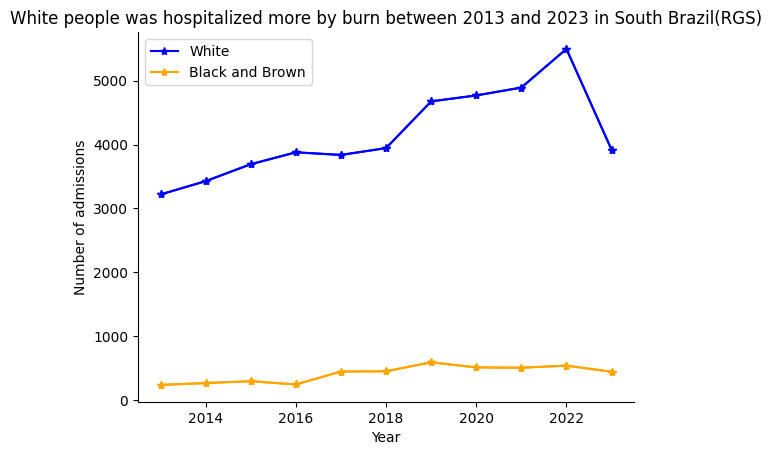

In [247]:
plt.figure(figsize=(12, 6))
total_colour = [df_int_brancos[['Ano', 'Total']], df_int_pp[['Total']]]
df_combined = pd.concat(total_colour, axis=1)

df_combined.plot(x='Ano', y=['Total', 'Total'], marker='*',color=['blue', 'orange'])
df_combined = plt.gca()
df_combined.spines['top'].set_visible(False)
df_combined.spines['right'].set_visible(False)


plt.title('White people was hospitalized more by burn between 2013 and 2023 in South Brazil(RGS)')
plt.xlabel('Year')
plt.ylabel('Number of admissions')
plt.legend(['White', 'Black and Brown'])

plt.grid(False)
plt.show()

*Here we can see the increase of number of admissions along 10 years, and the higher number in 2022. The number decrease in 2023 (data untill August)

In [248]:
g1_causa = pd.read_csv('/content/G1_causa_sih_cnv_firs223125189_6_236_14 - sih_cnv_firs223125189_6_236_14.csv')
g2_causa = pd.read_csv('/content/G2_causa_sih_cnv_firs220048189_6_236_14 copy.csv')
g3_causa = pd.read_csv('/content/G3_causa_sih_cnv_firs220240189_6_236_14 copy.csv')

In [249]:
g1_causa.head()

,Ano,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Caí e Metropolitana,43009 regiao 09 Carbonifera Costa Doce,...,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43024 regiao 24 Campos de Cima da Serra,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,43030 regiao 30 Vale da Luz,Total
0,2013,5.0,2.8,2.0,NaN,3.9,7.0,4.8,4.0,NaN,...,NaN,NaN,NaN,4.3,4.0,4.1,3.5,9.3,NaN,106.0
1,2014,4.9,2.7,10.0,9.0,4.2,5.8,5.0,6.4,NaN,...,2.0,NaN,NaN,3.7,3.9,2.9,3.4,3.3,NaN,108.5
2,2015,5.0,5.3,4.0,1.0,4.3,16.0,4.3,5.5,NaN,...,NaN,NaN,NaN,2.5,4.5,3.3,3.3,2.7,NaN,104.1
3,2016,4.0,3.9,4.5,NaN,4.7,10.7,4.3,5.3,1.0,...,NaN,2.0,NaN,3.0,3.3,3.1,2.7,2.6,NaN,81.7
4,2017,4.7,2.8,3.0,0.3,4.5,2.9,4.2,6.1,NaN,...,NaN,NaN,NaN,3.6,3.2,3.0,2.9,3.5,NaN,74.3


In [250]:
g1_causa.tail()

,Ano,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Caí e Metropolitana,43009 regiao 09 Carbonifera Costa Doce,...,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43024 regiao 24 Campos de Cima da Serra,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,43030 regiao 30 Vale da Luz,Total
6,2019,6.0,3.2,1.7,NaN,5.1,6.2,4.4,5.4,NaN,...,NaN,3.0,NaN,5.1,4.0,3.8,3.0,2.8,NaN,97.2
7,2020,2.7,2.5,NaN,NaN,4.8,6.3,3.9,4.2,NaN,...,NaN,8.0,NaN,3.1,3.0,2.9,3.5,3.8,5.5,117.8
8,2021,6.9,2.8,1.0,2.5,4.0,3.0,3.6,4.7,6.5,...,NaN,2.0,NaN,2.7,3.3,2.2,3.6,3.8,5.6,106.8
9,2022,3.6,3.4,NaN,3.2,4.3,28.3,4.1,5.4,1.0,...,NaN,4.0,1.0,2.7,1.5,3.3,3.4,2.7,4.3,115.7
10,2023,4.4,5.1,NaN,5.5,4.6,2.7,5.5,4.3,2.0,...,NaN,3.5,8.0,3.0,1.8,1.9,3.1,3.5,7.6,109.9


In [251]:
g2_causa.head()

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 CarboniferaCosta Doce,43010 regiao 10 Capital e Vale do Gravatai,...,43016 regiao 16 Alto Uruguai Gaucho,43017 regiao 17 Planalto,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
0,2013,NaN,6.0,1.0,6.0,NaN,1.0,NaN,NaN,286,...,NaN,1.0,2.0,NaN,NaN,4.0,1.0,NaN,NaN,309
1,2014,NaN,6.0,NaN,NaN,NaN,NaN,2.0,NaN,231,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,246
2,2015,1.0,4.0,3.0,2.0,NaN,NaN,3.0,NaN,190,...,NaN,NaN,1.0,NaN,2.0,8.0,NaN,NaN,NaN,215
3,2016,NaN,NaN,2.0,1.0,NaN,NaN,2.0,NaN,194,...,NaN,1.0,NaN,1.0,1.0,NaN,3.0,NaN,NaN,211
4,2017,1.0,2.0,NaN,NaN,NaN,NaN,5.0,1.0,281,...,1.0,4.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,302


In [252]:
g2_causa.tail()

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 CarboniferaCosta Doce,43010 regiao 10 Capital e Vale do Gravatai,...,43016 regiao 16 Alto Uruguai Gaucho,43017 regiao 17 Planalto,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
6,2019,1.0,3.0,NaN,2.0,1.0,NaN,2.0,NaN,186,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,201
7,2020,2.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,241,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255
8,2021,1.0,2.0,1.0,NaN,1.0,NaN,NaN,1.0,173,...,NaN,6.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,204
9,2022,NaN,1.0,2.0,NaN,NaN,1.0,1.0,NaN,180,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189
10,2023,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,167,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,175


In [253]:
g3_causa.head()

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera/Costa Doce,43010 regiao 10 Capital e Vale do Gravatai,43011 regiao 11 Sete Povos das Missoes,...,43020 regiao 20 Rota da Producao,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
0,2013,NaN,2,NaN,NaN,NaN,2.0,NaN,79,3.0,...,NaN,NaN,NaN,11,1,4.0,1.0,2.0,NaN,116
1,2014,NaN,2,1.0,NaN,NaN,1.0,NaN,123,2.0,...,NaN,NaN,1.0,10,4,NaN,NaN,NaN,1.0,157
2,2015,NaN,1,NaN,1.0,1.0,1.0,NaN,188,1.0,...,NaN,NaN,NaN,21,2,NaN,NaN,2.0,NaN,230
3,2016,NaN,18,1.0,1.0,1.0,1.0,NaN,170,NaN,...,NaN,NaN,NaN,16,5,NaN,NaN,1.0,NaN,225
4,2017,1.0,2,1.0,NaN,NaN,3.0,2.0,145,NaN,...,NaN,NaN,NaN,5,5,NaN,NaN,1.0,1.0,180


In [254]:
g3_causa.tail()

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera/Costa Doce,43010 regiao 10 Capital e Vale do Gravatai,43011 regiao 11 Sete Povos das Missoes,...,43020 regiao 20 Rota da Producao,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
6,2019,3.0,2,2.0,NaN,NaN,1.0,NaN,138,NaN,...,1.0,1.0,NaN,16,10,NaN,NaN,1.0,NaN,190
7,2020,2.0,2,13.0,1.0,1.0,NaN,NaN,106,NaN,...,NaN,NaN,NaN,25,8,NaN,NaN,NaN,NaN,176
8,2021,1.0,2,16.0,NaN,NaN,NaN,1.0,101,NaN,...,1.0,NaN,NaN,25,7,NaN,NaN,3.0,NaN,170
9,2022,NaN,4,7.0,NaN,NaN,NaN,NaN,84,NaN,...,1.0,NaN,NaN,14,4,3.0,NaN,NaN,NaN,128
10,2023,2.0,2,8.0,1.0,NaN,2.0,NaN,86,NaN,...,1.0,1.0,NaN,11,7,NaN,NaN,NaN,NaN,134


In [255]:
print('Colunas         \t      Porcentagem')
(g1_causa.isnull().sum() / g1_causa.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43022 regiao 22  Pampa                              90.91
43020 regiao 20  Rota da Producao                   81.82
43024 regiao 24  Campos de Cima da Serra            81.82
43011 regiao 11  Sete Povos das Missoes             81.82
43009 regiao 09  Carbonifera Costa Doce             63.64
43016 regiao 16  Alto Uruguai Gaucho                63.64
43030 regiao 30  Vale da Luz                        63.64
43012 regiao 12  Portal das Missoes                 54.55
43013 regiao 13  Diversidade                        45.45
43004 regiao 04  Belas Praias                       36.36
43023 regiao 23  Caxias e Hortensias                36.36
43019 regiao 19  Botucarai                          36.36
43003 regiao 03  Fronteira Oeste                    27.27
43014 regiao 14  Fronteira Noroeste                  9.09
43017 regiao 17  Planalto                            9.09
43018 regiao 18  Araucarias                          9.09
43028 regiao 28  Vinte e Oito                        0.00
43027 regiao 2

In [256]:
print('Colunas         \t      Porcentagem')
(g2_causa.isnull().sum() / g2_causa.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43015 regiao 15  Caminho das Aguas                  90.91
43029 regiao 29  Vales e Montanhas                  90.91
43025 regiao 25  Vinhedos e Basalto                 81.82
43009 regiao 09  CarboniferaCosta Doce              81.82
43023 regiao 23  Caxias e Hortensias                72.73
43007 regiao 07  Vale dos Sinos                     72.73
43028 regiao 28  Vinte e Oito                       72.73
43021 regiao 21  Sul                                72.73
43016 regiao 16  Alto Uruguai Gaucho                72.73
43006 regiao 06  Vale do Paranhana e Costa Serra    63.64
43022 regiao 22  Pampa                              63.64
43011 regiao 11  Sete Povos das Missoes             63.64
43026 regiao 26  Uva Vale                           54.55
43005 regiao 05  Bons Ventos                        54.55
43012 regiao 12  Portal das Missoes                 45.45
43001 regiao 01  Verdes Campos                      45.45
43004 regiao 04  Belas Praias                       45.45
43017 regiao 1

In [257]:
print('Colunas         \t      Porcentagem')
(g3_causa.isnull().sum() / g3_causa.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43027 regiao 27  Jacui Centro                       90.91
43022 regiao 22  Pampa                              90.91
43009 regiao 09  Carbonifera/Costa Doce             81.82
43029 regiao 29  Vales e Montanhas                  81.82
43021 regiao 21  Sul                                81.82
43019 regiao 19  Botucarai                          72.73
43026 regiao 26  Uva Vale                           72.73
43011 regiao 11  Sete Povos das Missoes             72.73
43007 regiao 07  Vale dos Sinos                     72.73
43006 regiao 06  Vale do Paranhana e Costa Serra    63.64
43020 regiao 20  Rota da Producao                   54.55
43001 regiao 01  Verdes Campos                      45.45
43028 regiao 28  Vinte e Oito                       36.36
43017 regiao 17  Planalto                           36.36
43008 regiao 08  Vale do Cai e Metropolitana        27.27
43013 regiao 13  Diversidade                        18.18
43016 regiao 16  Alto Uruguai Gaucho                18.18
43004 regiao 0

*It was decided do not remove missing values because I understand that there is no admissions in these cases.

In [258]:
g1_causa.dtypes

Ano                                                   int64
43001 regiao 01  Verdes Campos                      float64
43002 regiao 02  Entre Rios                         float64
43003 regiao 03  Fronteira Oeste                    float64
43004 regiao 04  Belas Praias                       float64
43005 regiao 05  Bons Ventos                        float64
43006 regiao 06  Vale do Paranhana e Costa Serra    float64
43007 regiao 07  Vale dos Sinos                     float64
43008 regiao 08  Vale do Caí e Metropolitana        float64
43009 regiao 09  Carbonifera Costa Doce             float64
43010 regiao 10  Capital e Vale do Gravataí         float64
43011 regiao 11  Sete Povos das Missoes             float64
43012 regiao 12  Portal das Missoes                 float64
43013 regiao 13  Diversidade                        float64
43014 regiao 14  Fronteira Noroeste                 float64
43015 regiao 15  Caminho das Aguas                  float64
43016 regiao 16  Alto Uruguai Gaucho    

In [259]:
g2_causa.dtypes

Ano                                                   int64
43001 regiao 01  Verdes Campos                      float64
43003 regiao 03  Fronteira Oeste                    float64
43004 regiao 04  Belas Praias                       float64
43005 regiao 05  Bons Ventos                        float64
43006 regiao 06  Vale do Paranhana e Costa Serra    float64
43007 regiao 07  Vale dos Sinos                     float64
43008 regiao 08  Vale do Cai e Metropolitana        float64
43009 regiao 09  CarboniferaCosta Doce              float64
43010 regiao 10  Capital e Vale do Gravatai           int64
43011 regiao 11  Sete Povos das Missoes             float64
43012 regiao 12  Portal das Missoes                 float64
43013 regiao 13  Diversidade                        float64
43014 regiao 14  Fronteira Noroeste                 float64
43015 regiao 15  Caminho das Aguas                  float64
43016 regiao 16  Alto Uruguai Gaucho                float64
43017 regiao 17  Planalto               

In [260]:
g3_causa.dtypes

Ano                                                   int64
43001 regiao 01  Verdes Campos                      float64
43003 regiao 03  Fronteira Oeste                      int64
43004 regiao 04  Belas Praias                       float64
43006 regiao 06  Vale do Paranhana e Costa Serra    float64
43007 regiao 07  Vale dos Sinos                     float64
43008 regiao 08  Vale do Cai e Metropolitana        float64
43009 regiao 09  Carbonifera/Costa Doce             float64
43010 regiao 10  Capital e Vale do Gravatai           int64
43011 regiao 11  Sete Povos das Missoes             float64
43012 regiao 12  Portal das Missoes                 float64
43013 regiao 13  Diversidade                        float64
43014 regiao 14  Fronteira Noroeste                 float64
43015 regiao 15  Caminho das Aguas                  float64
43016 regiao 16  Alto Uruguai Gaucho                float64
43017 regiao 17  Planalto                           float64
43019 regiao 19  Botucarai              

In [261]:
g1_causa.describe().round(2)

,Ano,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Caí e Metropolitana,43009 regiao 09 Carbonifera Costa Doce,...,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43024 regiao 24 Campos de Cima da Serra,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,43030 regiao 30 Vale da Luz,Total
count,11.00,11.00,11.00,8.00,7.00,11.00,11.00,11.00,11.00,4.00,...,1.0,7.00,2.00,11.00,11.00,11.00,11.00,11.00,4.00,11.00
mean,2018.00,4.64,3.45,4.18,3.89,4.49,8.38,4.39,5.14,2.62,...,2.0,4.04,4.50,3.42,3.34,3.04,3.22,3.80,5.75,100.98
std,3.32,1.15,0.96,3.06,3.04,0.39,7.71,0.53,0.77,2.63,...,NaN,2.18,4.95,0.79,0.96,0.62,0.29,1.89,1.37,13.97
min,2013.00,2.70,2.50,1.00,0.30,3.90,2.70,3.60,4.00,1.00,...,2.0,2.00,1.00,2.50,1.50,1.90,2.70,2.60,4.30,74.30
25%,2015.50,3.90,2.80,1.92,1.75,4.25,3.15,4.15,4.50,1.00,...,2.0,2.50,2.75,2.85,3.10,2.90,3.00,2.75,5.20,93.00
50%,2018.00,4.70,3.20,3.50,3.20,4.50,6.20,4.30,5.30,1.50,...,2.0,3.50,4.50,3.10,3.30,3.00,3.30,3.50,5.55,106.00
75%,2020.50,5.00,3.70,5.18,5.60,4.75,8.85,4.60,5.45,3.12,...,2.0,4.90,6.25,3.80,4.00,3.30,3.45,3.80,6.10,109.20
max,2023.00,6.90,5.30,10.00,9.00,5.10,28.30,5.50,6.40,6.50,...,2.0,8.00,8.00,5.10,4.50,4.10,3.60,9.30,7.60,117.80


*The averages (mean) and medians are different among health regions

In [262]:
g2_causa.describe().round(2)

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 CarboniferaCosta Doce,43010 regiao 10 Capital e Vale do Gravatai,...,43016 regiao 16 Alto Uruguai Gaucho,43017 regiao 17 Planalto,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
count,11.00,6.00,10.00,6.00,5.00,4.0,3.0,7.00,2.0,11.00,...,3.0,7.00,3.00,4.0,3.00,2.00,5.0,3.00,1.0,11.00
mean,2018.00,1.33,3.30,1.67,2.40,1.0,1.0,2.29,1.0,211.36,...,1.0,2.71,1.33,1.0,1.33,6.00,4.2,1.67,1.0,229.73
std,3.32,0.52,2.31,0.82,2.07,0.0,0.0,1.38,0.0,42.12,...,0.0,1.98,0.58,0.0,0.58,2.83,6.1,0.58,NaN,43.83
min,2013.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00,1.0,167.00,...,1.0,1.00,1.00,1.0,1.00,4.00,1.0,1.00,1.0,175.00
25%,2015.50,1.00,1.25,1.00,1.00,1.0,1.0,1.50,1.0,183.00,...,1.0,1.00,1.00,1.0,1.00,5.00,1.0,1.50,1.0,202.50
50%,2018.00,1.00,2.50,1.50,2.00,1.0,1.0,2.00,1.0,194.00,...,1.0,2.00,1.00,1.0,1.00,6.00,1.0,2.00,1.0,215.00
75%,2020.50,1.75,5.50,2.00,2.00,1.0,1.0,2.50,1.0,236.00,...,1.0,4.00,1.50,1.0,1.50,7.00,3.0,2.00,1.0,250.50
max,2023.00,2.00,7.00,3.00,6.00,1.0,1.0,5.00,1.0,286.00,...,1.0,6.00,2.00,1.0,2.00,8.00,15.0,2.00,1.0,309.00


*The averages (mean) are different among health regions, however, median (50%) are similar. IQR 25 and 75 varies among regions. Sometimes are a short range, sometimes large.

<Figure size 1200x600 with 0 Axes>

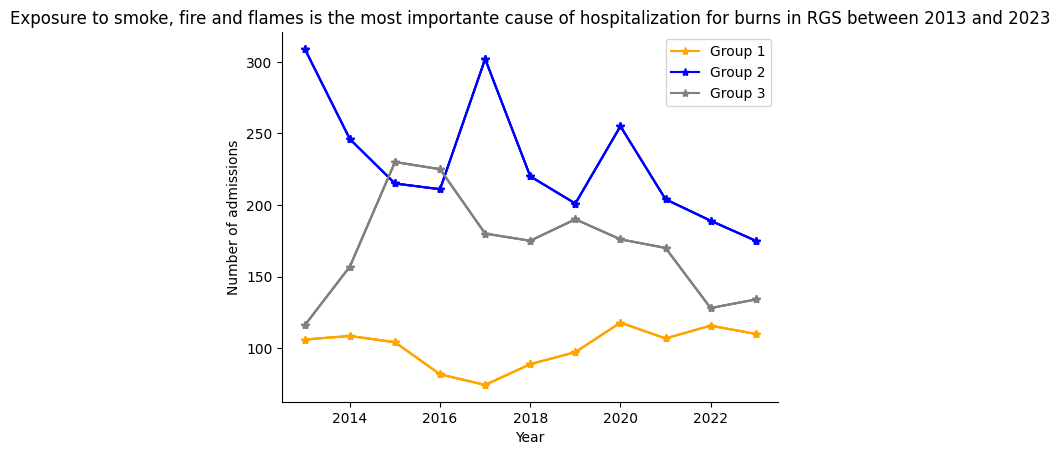

In [263]:
# Lineplot of sources of burn
plt.figure(figsize=(12, 6))
# Combined 3 columns [Total] from 3 different dataframes Group 1, 2 and 3
# Creating a new dataframe with this 3 combined columns
dataframe2 = [g1_causa[['Ano', 'Total']], g2_causa[['Total']],g3_causa[['Total']]]
df_combined = pd.concat(dataframe2, axis=1)

# Parameter "color" in the plot method to specify the serie colors, because of Pandas default
df_combined.plot(x='Ano', y=['Total', 'Total', 'Total'], marker='*',color=['orange', 'blue', 'gray'])

# Removing axes in the top and in the rigth
df_combined = plt.gca()
df_combined.spines['top'].set_visible(False)
df_combined.spines['right'].set_visible(False)

plt.title('Exposure to smoke, fire and flames is the most importante cause of hospitalization for burns in RGS between 2013 and 2023')
plt.xlabel('Year')
plt.ylabel('Number of admissions')
plt.legend(['Group 1', 'Group 2', 'Group 3'])

plt.grid(False)
plt.show()

*The most important cause of admissions among burned was group 2 (Exposure to smoke, fire and flames) and the number of cases varies along the decade. The same variation behaviour happened with group 3 (although only between 2015 and 2016 did the cases overlap with group 2). The group 1 varied less in comparation with 2 and 3.

In [264]:
g1_obito = pd.read_csv('/content/G1_obitos_sih_cnv_firs221533189_6_236_14 copy - sih_cnv_firs221533189_6_236_14 copy.csv')
g2_obito = pd.read_csv('/content/G2_Obitos_sih_cnv_firs221826189_6_236_14 copy.csv')
g3_obito = pd.read_csv('/content/G3_Obitos_sih_cnv_firs222051189_6_236_14 copy.csv')

In [265]:
g1_obito.head()

,Ano,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43010 regiao 10 Capital e Vale do Gravatai,43015 regiao 15 Caminho das Aguas,Total
0,2013,NaN,NaN,NaN,NaN,13,NaN,44,1,4,1,63
1,2014,NaN,NaN,NaN,NaN,29,NaN,27,13,3,2,74
2,2015,NaN,NaN,1.0,NaN,11,NaN,28,14,5,2,61
3,2016,NaN,NaN,NaN,NaN,14,NaN,37,14,4,6,75
4,2017,NaN,1.0,NaN,NaN,20,NaN,25,11,21,8,86


In [266]:
g2_obito.head()

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43010 regiao 10 Capital e Vale do Gravatai,43012 regiao 12 Portal das Missoes,43017 regiao 17 Planalto,Total
0,2013,NaN,NaN,NaN,24,NaN,NaN,24
1,2014,NaN,NaN,NaN,8,1.0,NaN,9
2,2015,NaN,NaN,1.0,12,NaN,NaN,13
3,2016,NaN,NaN,NaN,11,1.0,1.0,13
4,2017,NaN,NaN,NaN,16,NaN,NaN,16


In [267]:
g3_obito.head()

,Ano,43003 regiao 03 Fronteira Oeste,43010 regiao 10 Capital e Vale do Gravatai,43013 regiao 13 Diversidade,43017 regiao 17 Planalto,43023 regiao 23 Caxias e Hortensias,Total
0,2013,NaN,2,NaN,NaN,2.0,4
1,2014,NaN,4,NaN,NaN,NaN,4
2,2015,NaN,3,NaN,NaN,1.0,4
3,2016,NaN,4,NaN,NaN,NaN,4
4,2017,NaN,2,NaN,NaN,1.0,3


In [268]:
print('Colunas         \t      Porcentagem')
(g1_obito.isnull().sum() / g1_obito.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43006 regiao 06  Vale do Paranhana e Costa Serra    90.91
43001 regiao 01  Verdes Campos                      81.82
43003 regiao 03  Fronteira Oeste                    81.82
43004 regiao 04  Belas Praias                       81.82
43002 regiao 02  Entre Rios                         72.73
Ano                                                  0.00
43005 regiao 05  Bons Ventos                         0.00
43007 regiao 07  Vale dos Sinos                      0.00
43008 regiao 08  Vale do Cai e Metropolitana         0.00
43010 regiao 10  Capital e Vale do Gravatai          0.00
43015 regiao 15  Caminho das Aguas                   0.00
Total                                                0.00
dtype: float64

In [269]:
print('Colunas         \t      Porcentagem')
(g2_obito.isnull().sum() / g2_obito.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43001 regiao 01  Verdes Campos                 90.91
43003 regiao 03  Fronteira Oeste               90.91
43004 regiao 04  Belas Praias                  90.91
43017 regiao 17  Planalto                      72.73
43012 regiao 12  Portal das Missoes            63.64
Ano                                             0.00
43010 regiao 10  Capital e Vale do Gravatai     0.00
Total                                           0.00
dtype: float64

In [270]:
print('Colunas         \t      Porcentagem')
(g3_obito.isnull().sum() / g3_obito.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43003 regiao 03  Fronteira Oeste               83.33
43013 regiao 13  Diversidade                   83.33
43017 regiao 17  Planalto                      83.33
43023 regiao 23  Caxias e Hortensias           58.33
Ano                                             0.00
43010 regiao 10  Capital e Vale do Gravatai     0.00
Total                                           0.00
dtype: float64

*It was decided do not remove missing values because I understand that there is no admissions in these cases.

In [271]:
g1_obito.dtypes

Ano                                                   int64
43001 regiao 01  Verdes Campos                      float64
43002 regiao 02  Entre Rios                         float64
43003 regiao 03  Fronteira Oeste                    float64
43004 regiao 04  Belas Praias                       float64
43005 regiao 05  Bons Ventos                          int64
43006 regiao 06  Vale do Paranhana e Costa Serra    float64
43007 regiao 07  Vale dos Sinos                       int64
43008 regiao 08  Vale do Cai e Metropolitana          int64
43010 regiao 10  Capital e Vale do Gravatai           int64
43015 regiao 15  Caminho das Aguas                    int64
Total                                                 int64
dtype: object

In [272]:
g2_obito.dtypes

Ano                                              int64
43001 regiao 01  Verdes Campos                 float64
43003 regiao 03  Fronteira Oeste               float64
43004 regiao 04  Belas Praias                  float64
43010 regiao 10  Capital e Vale do Gravatai      int64
43012 regiao 12  Portal das Missoes            float64
43017 regiao 17  Planalto                      float64
Total                                            int64
dtype: object

In [273]:
g3_obito.dtypes

Ano                                             object
43003 regiao 03  Fronteira Oeste               float64
43010 regiao 10  Capital e Vale do Gravatai      int64
43013 regiao 13  Diversidade                   float64
43017 regiao 17  Planalto                      float64
43023 regiao 23  Caxias e Hortensias           float64
Total                                            int64
dtype: object

In [274]:
g1_obito.describe().round(2)

,Ano,43001 regiao 01 Verdes Campos,43002 regiao 02 Entre Rios,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43010 regiao 10 Capital e Vale do Gravatai,43015 regiao 15 Caminho das Aguas,Total
count,11.00,2.00,3.00,2.0,2.00,11.00,1.0,11.00,11.00,11.00,11.00,11.00
mean,2018.00,1.50,1.67,1.0,5.50,19.27,1.0,27.64,13.45,49.64,7.09,119.09
std,3.32,0.71,1.15,0.0,4.95,6.45,NaN,8.26,5.75,46.27,4.39,53.02
min,2013.00,1.00,1.00,1.0,2.00,11.00,1.0,14.00,1.00,3.00,1.00,61.00
25%,2015.50,1.25,1.00,1.0,3.75,14.00,1.0,23.00,11.00,4.50,3.00,74.50
50%,2018.00,1.50,1.00,1.0,5.50,18.00,1.0,27.00,14.00,24.00,8.00,93.00
75%,2020.50,1.75,2.00,1.0,7.25,25.50,1.0,31.50,17.50,95.00,10.00,167.50
max,2023.00,2.00,3.00,1.0,9.00,29.00,1.0,44.00,21.00,108.00,14.00,197.00


*In group 1, among health regions there are a huge difference in average (mean) and median of dead. The same happened with standard deviation in some regions and IQR. It's important to note the highest average and median in region number 10.

In [275]:
g2_obito.describe().round(2)

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43010 regiao 10 Capital e Vale do Gravatai,43012 regiao 12 Portal das Missoes,43017 regiao 17 Planalto,Total
count,11.00,1.0,1.0,1.0,11.00,4.0,3.0,11.00
mean,2018.00,1.0,1.0,1.0,14.73,1.0,1.0,15.64
std,3.32,NaN,NaN,NaN,4.63,0.0,0.0,4.25
min,2013.00,1.0,1.0,1.0,8.00,1.0,1.0,9.00
25%,2015.50,1.0,1.0,1.0,11.50,1.0,1.0,13.00
50%,2018.00,1.0,1.0,1.0,14.00,1.0,1.0,15.00
75%,2020.50,1.0,1.0,1.0,16.50,1.0,1.0,16.50
max,2023.00,1.0,1.0,1.0,24.00,1.0,1.0,24.00


*In group 2, all the regions have similar average (mean) and median of deads. However, the region number 10 has the most extense average and median along the decade.

In [276]:
g3_obito.describe().round(2)

,43003 regiao 03 Fronteira Oeste,43010 regiao 10 Capital e Vale do Gravatai,43013 regiao 13 Diversidade,43017 regiao 17 Planalto,43023 regiao 23 Caxias e Hortensias,Total
count,2.0,12.00,2.0,2.0,5.00,12.00
mean,1.0,5.50,1.0,1.0,2.00,6.83
std,0.0,8.88,0.0,0.0,1.73,10.92
min,1.0,1.00,1.0,1.0,1.00,1.00
25%,1.0,1.75,1.0,1.0,1.00,2.75
50%,1.0,3.00,1.0,1.0,1.00,4.00
75%,1.0,4.00,1.0,1.0,2.00,4.50
max,1.0,33.00,1.0,1.0,5.00,41.00


*Again, in group 3, region number 10 has the highest average (mean) and median of dead.

<Figure size 1200x600 with 0 Axes>

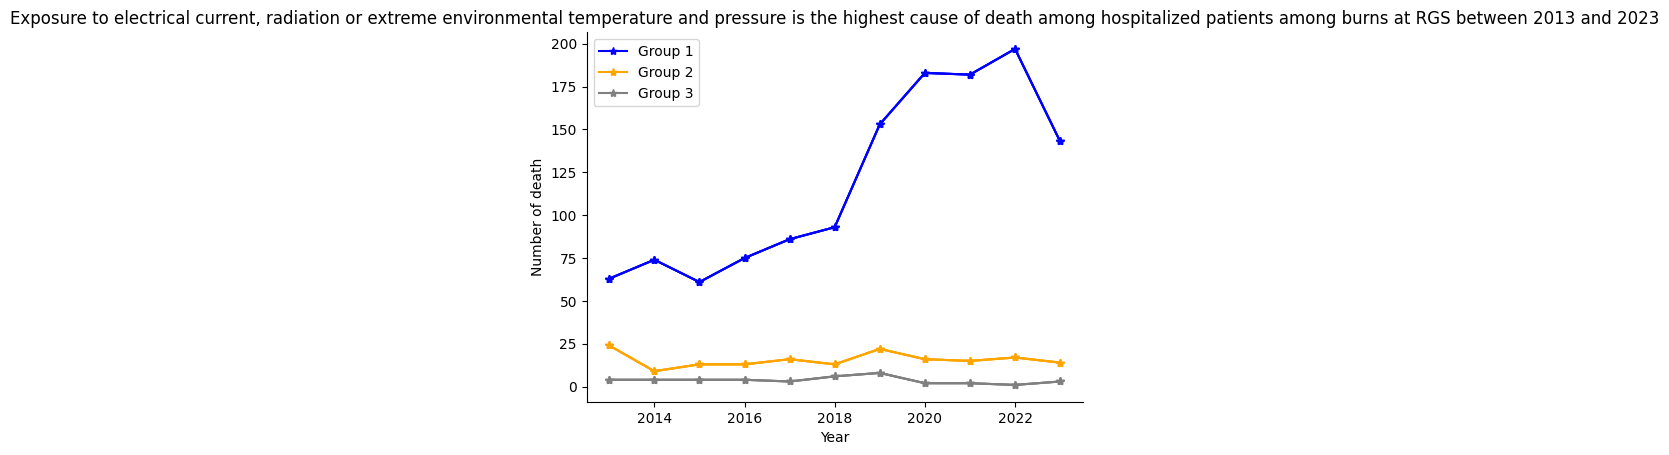

In [277]:
# Lineplot of dead
plt.figure(figsize=(12, 6))
# Adding 3 columns [Total] from de 3 different dataframes (Grupo 1, 2 and 3)
# Building a new dataframe
dataframe3 = [g1_obito[['Ano', 'Total']], g2_obito[['Total']],g3_obito[['Total']]]
df_combined = pd.concat(dataframe3, axis=1)

# Parameter "color" in the plot method to specify the serie colors, because of Pandas default
df_combined.plot(x='Ano', y=['Total', 'Total', 'Total'], marker='*',color=['blue', 'orange', 'gray'])

df_combined = plt.gca()
df_combined.spines['top'].set_visible(False)
df_combined.spines['right'].set_visible(False)

plt.title('Exposure to electrical current, radiation or extreme environmental temperature and pressure is the highest cause of death among hospitalized patients among burns at RGS between 2013 and 2023')
plt.xlabel('Year')
plt.ylabel('Number of death')
plt.legend(['Group 1', 'Group 2', 'Group 3'])

plt.grid(False)
plt.show()

*The highest cause of death among burn hospitalized pacients is because of exposure to electrical current, radiation or extreme environmental temperature and pressure. Addictionally, group 1 was increasing since 2015 and the highest value was in 2022 (the data was avaiable untill August 2023). Meanwhile, group 2 and 3 have similar behaviour along the decade.

In [278]:
tm_int1 = pd.read_csv('/content/G1_TM_int_sih_cnv_firs223125189_6_236_14 copy.csv')
tm_int2 = pd.read_csv('/content/G2_TM_int_sih_cnv_firs141548189_6_236_14 copy.csv')
tm_int3 = pd.read_csv('/content/G3_TM_int_sih_cnv_firs142109189_6_236_14 (1) copy.csv')

In [279]:
tm_int1.head()

,Ano,43001 Regiao 01 Verdes Campos,43002 Regiao 02 Entre Rios,43003 Regiao 03 Fronteira Oeste,43004 Regiao 04 Belas Praias,43005 Regiao 05 Bons Ventos,43006 Regiao 06 Vale do Paranhana e Costa Serra,43007 Regiao 07 Vale dos Sinos,43008 Regiao 08 Vale do Cai e Metropolitana,43009 Regiao 09 Carbonifera Costa Doce,...,43022 Regiao 22 Pampa,43023 Regiao 23 Caxias e Hortensias,43024 Regiao 24 Campos de Cima da Serra,43025 Regiao 25 Vinhedos e Basalto,43026 Regiao 26 Uva Vale,43027 Regiao 27 Jacui Centro,43028 Regiao 28 Vinte e Oito,43029 Regiao 29 Vales e Montanhas,43030 Regiao 30 Vale da Luz,Total
0,2013,5.0,2.8,2.0,NaN,3.9,7.0,4.8,4.0,NaN,...,NaN,NaN,NaN,4.3,4.0,4.1,3.5,9.3,NaN,5.3
1,2014,4.9,2.7,10.0,9.0,4.2,5.8,5.0,6.4,NaN,...,2.0,NaN,NaN,3.7,3.9,2.9,3.4,3.3,NaN,4.9
2,2015,5.0,5.3,4.0,1.0,4.3,16.0,4.3,5.5,NaN,...,NaN,NaN,NaN,2.5,4.5,3.3,3.3,2.7,NaN,4.7
3,2016,4.0,3.9,4.5,NaN,4.7,10.7,4.3,5.3,1.0,...,NaN,2.0,NaN,3.0,3.3,3.1,2.7,2.6,NaN,4.1
4,2017,4.7,2.8,3.0,0.3,4.5,2.9,4.2,6.1,NaN,...,NaN,NaN,NaN,3.6,3.2,3.0,2.9,3.5,NaN,4.1


In [280]:
tm_int1.tail()

,Ano,43001 Regiao 01 Verdes Campos,43002 Regiao 02 Entre Rios,43003 Regiao 03 Fronteira Oeste,43004 Regiao 04 Belas Praias,43005 Regiao 05 Bons Ventos,43006 Regiao 06 Vale do Paranhana e Costa Serra,43007 Regiao 07 Vale dos Sinos,43008 Regiao 08 Vale do Cai e Metropolitana,43009 Regiao 09 Carbonifera Costa Doce,...,43022 Regiao 22 Pampa,43023 Regiao 23 Caxias e Hortensias,43024 Regiao 24 Campos de Cima da Serra,43025 Regiao 25 Vinhedos e Basalto,43026 Regiao 26 Uva Vale,43027 Regiao 27 Jacui Centro,43028 Regiao 28 Vinte e Oito,43029 Regiao 29 Vales e Montanhas,43030 Regiao 30 Vale da Luz,Total
6,2019,6.0,3.2,1.7,NaN,5.1,6.2,4.4,5.4,NaN,...,NaN,3.0,NaN,5.1,4.0,3.8,3.0,2.8,NaN,4.4
7,2020,2.7,2.5,NaN,NaN,4.8,6.3,3.9,4.2,NaN,...,NaN,8.0,NaN,3.1,3.0,2.9,3.5,3.8,5.5,4.9
8,2021,6.9,2.8,1.0,2.5,4.0,3.0,3.6,4.7,6.5,...,NaN,2.0,NaN,2.7,3.3,2.2,3.6,3.8,5.6,4.5
9,2022,3.6,3.4,NaN,3.2,4.3,28.3,4.1,5.4,1.0,...,NaN,4.0,1.0,2.7,1.5,3.3,3.4,2.7,4.3,4.8
10,2023,4.4,5.1,NaN,5.5,4.6,2.7,5.5,4.3,2.0,...,NaN,3.5,8.0,3.0,1.8,1.9,3.1,3.5,7.6,4.4


In [281]:
tm_int2.head()

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera Costa Doce,43010 regiao 10 Capital e Vale do Gravatai,...,43016 regiao 16 Alto Uruguai Gaucho,43017 regiao 17 Planalto,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
0,2013,NaN,5.0,1.0,3.0,NaN,4.0,NaN,NaN,11.3,...,NaN,35.0,3.5,NaN,NaN,11.0,7.0,NaN,NaN,11.1
1,2014,NaN,11.7,NaN,NaN,NaN,NaN,6.0,NaN,12.3,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,3.5,NaN,12.0
2,2015,2.0,12.3,9.3,4.0,NaN,NaN,5.0,NaN,11.8,...,NaN,NaN,2.0,NaN,2.5,2.9,NaN,NaN,NaN,11.0
3,2016,NaN,NaN,4.5,5.0,NaN,NaN,5.5,NaN,11.4,...,NaN,1.0,NaN,3.0,68.0,NaN,6.0,NaN,NaN,11.1
4,2017,15.0,7.0,NaN,NaN,NaN,NaN,6.8,10.0,11.9,...,3.0,4.8,NaN,NaN,NaN,NaN,2.0,3.0,3.0,11.5


In [282]:
tm_int2.tail()

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera Costa Doce,43010 regiao 10 Capital e Vale do Gravatai,...,43016 regiao 16 Alto Uruguai Gaucho,43017 regiao 17 Planalto,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
6,2019,2.0,4.3,NaN,2.0,3.0,NaN,3.0,NaN,10.4,...,2.0,NaN,NaN,4.0,NaN,NaN,1.0,NaN,NaN,10.0
7,2020,15.5,2.0,NaN,NaN,NaN,1.0,3.0,NaN,11.6,...,NaN,7.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.3
8,2021,16.0,9.0,1.0,NaN,11.0,NaN,NaN,9.0,11.2,...,NaN,2.5,NaN,NaN,NaN,NaN,1.7,NaN,NaN,10.1
9,2022,NaN,11.0,1.0,NaN,NaN,NaN,NaN,NaN,11.2,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.8
10,2023,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,10.2,...,3.0,NaN,15.0,6.0,NaN,NaN,NaN,NaN,NaN,10.0


In [283]:
tm_int3.head()

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera Costa Doce,43010 regiao 10 Capital e Vale do Gravatai,43011 regiao 11 Sete Povos das Missoes,...,43020 regiao 20 Rota da Producao,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
0,2013,NaN,12.5,NaN,NaN,NaN,6.0,NaN,11.0,12.0,...,NaN,NaN,NaN,16.5,9.0,3.0,4.0,2.5,NaN,10.6
1,2014,NaN,4.0,NaN,NaN,NaN,12.0,NaN,9.4,5.5,...,NaN,NaN,4.0,6.0,7.5,NaN,NaN,NaN,18.0,8.7
2,2015,NaN,2.0,NaN,6.0,20.0,9.0,NaN,9.3,8.0,...,NaN,NaN,NaN,10.8,2.0,NaN,NaN,0.5,NaN,9.2
3,2016,NaN,4.1,1.0,3.0,6.0,20.0,NaN,9.8,NaN,...,NaN,NaN,NaN,14.4,3.6,NaN,NaN,NaN,NaN,9.2
4,2017,4.0,4.0,4.0,NaN,NaN,0.7,1.0,9.8,NaN,...,NaN,NaN,NaN,5.8,1.0,NaN,NaN,3.0,3.0,8.6


In [284]:
tm_int3.tail()

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera Costa Doce,43010 regiao 10 Capital e Vale do Gravatai,43011 regiao 11 Sete Povos das Missoes,...,43020 regiao 20 Rota da Producao,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
6,2019,5.0,7.5,0.5,NaN,NaN,2.0,NaN,9.2,NaN,...,NaN,2.0,NaN,13.3,2.1,NaN,NaN,3.0,NaN,8.8
7,2020,2.5,4.0,2.5,1.0,1.0,NaN,NaN,8.9,NaN,...,NaN,NaN,NaN,8.0,1.3,NaN,NaN,NaN,NaN,7.1
8,2021,11.0,3.0,1.4,NaN,NaN,NaN,1.0,10.1,NaN,...,9.0,NaN,NaN,7.0,1.3,NaN,NaN,4.0,NaN,7.9
9,2022,NaN,5.3,1.7,NaN,NaN,NaN,NaN,10.6,NaN,...,2.0,NaN,NaN,8.4,1.5,6.0,NaN,NaN,NaN,8.6
10,2023,3.0,1.5,1.6,3.0,NaN,3.5,NaN,8.8,NaN,...,5.0,18.0,NaN,6.2,1.9,NaN,NaN,NaN,NaN,7.2


In [285]:
print('Colunas         \t      Porcentagem')
(tm_int1.isnull().sum() / tm_int1.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43022 Regiao 22  Pampa                              90.91
43020 Regiao 20  Rota da Producao                   81.82
43024 Regiao 24  Campos de Cima da Serra            81.82
43011 Regiao 11  Sete Povos das Missoes             81.82
43009 Regiao 09  Carbonifera Costa Doce             63.64
43016 Regiao 16  Alto Uruguai Gaucho                63.64
43030 Regiao 30  Vale da Luz                        63.64
43012 Regiao 12  Portal das Missoes                 54.55
43013 Regiao 13  Diversidade                        45.45
43004 Regiao 04  Belas Praias                       36.36
43023 Regiao 23  Caxias e Hortensias                36.36
43019 Regiao 19  Botucarai                          36.36
43003 Regiao 03  Fronteira Oeste                    27.27
43014 Regiao 14  Fronteira Noroeste                  9.09
43017 Regiao 17  Planalto                            9.09
43018 Regiao 18  Araucarias                          9.09
43028 Regiao 28  Vinte e Oito                        0.00
43027 Regiao 2

In [286]:
print('Colunas         \t      Porcentagem')
(tm_int2.isnull().sum() / tm_int2.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43015 regiao 15  Caminho das Aguas                  90.91
43029 regiao 29  Vales e Montanhas                  90.91
43025 regiao 25  Vinhedos e Basalto                 81.82
43007 regiao 07  Vale dos Sinos                     81.82
43009 regiao 09  Carbonifera Costa Doce             81.82
43023 regiao 23  Caxias e Hortensias                72.73
43006 regiao 06  Vale do Paranhana e Costa Serra    72.73
43028 regiao 28  Vinte e Oito                       72.73
43021 regiao 21  Sul                                72.73
43016 regiao 16  Alto Uruguai Gaucho                72.73
43022 regiao 22  Pampa                              63.64
43011 regiao 11  Sete Povos das Missoes             63.64
43026 regiao 26  Uva Vale                           54.55
43005 regiao 05  Bons Ventos                        54.55
43012 regiao 12  Portal das Missoes                 45.45
43001 regiao 01  Verdes Campos                      45.45
43008 regiao 08  Vale do Cai e Metropolitana        45.45
43004 regiao 0

In [287]:
print('Colunas         \t      Porcentagem')
(tm_int3.isnull().sum() / tm_int3.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


43027 regiao 27  Jacui Centro                       90.91
43022 regiao 22  Pampa                              90.91
43009 regiao 09  Carbonifera Costa Doce             81.82
43021 regiao 21  Sul                                81.82
43029 regiao 29  Vales e Montanhas                  81.82
43007 regiao 07  Vale dos Sinos                     72.73
43026 regiao 26  Uva Vale                           72.73
43019 regiao 19  Botucarai                          72.73
43011 regiao 11  Sete Povos das Missoes             72.73
43006 regiao 06  Vale do Paranhana e Costa Serra    63.64
43020 regiao 20  Rota da Producao                   63.64
43028 regiao 28  Vinte e Oito                       45.45
43001 regiao 01  Verdes Campos                      45.45
43017 regiao 17  Planalto                           36.36
43008 regiao 08  Vale do Cai e Metropolitana        27.27
43004 regiao 04  Belas Praias                       27.27
43016 regiao 16  Alto Uruguai Gaucho                27.27
43013 regiao 1

In [288]:
tm_int1.dtypes

Ano                                                   int64
43001 Regiao 01  Verdes Campos                      float64
43002 Regiao 02  Entre Rios                         float64
43003 Regiao 03  Fronteira Oeste                    float64
43004 Regiao 04  Belas Praias                       float64
43005 Regiao 05  Bons Ventos                        float64
43006 Regiao 06  Vale do Paranhana e Costa Serra    float64
43007 Regiao 07  Vale dos Sinos                     float64
43008 Regiao 08  Vale do Cai e Metropolitana        float64
43009 Regiao 09  Carbonifera Costa Doce             float64
43010 Regiao 10  Capital e Vale do Gravatai         float64
43011 Regiao 11  Sete Povos das Missoes             float64
43012 Regiao 12  Portal das Missoes                 float64
43013 Regiao 13  Diversidade                        float64
43014 Regiao 14  Fronteira Noroeste                 float64
43015 Regiao 15  Caminho das Aguas                  float64
43016 Regiao 16  Alto Uruguai Gaucho    

In [289]:
tm_int2.dtypes

Ano                                                   int64
43001 regiao 01  Verdes Campos                      float64
43003 regiao 03  Fronteira Oeste                    float64
43004 regiao 04  Belas Praias                       float64
43005 regiao 05  Bons Ventos                        float64
43006 regiao 06  Vale do Paranhana e Costa Serra    float64
43007 regiao 07  Vale dos Sinos                     float64
43008 regiao 08  Vale do Cai e Metropolitana        float64
43009 regiao 09  Carbonifera Costa Doce             float64
43010 regiao 10  Capital e Vale do Gravatai         float64
43011 regiao 11  Sete Povos das Missoes             float64
43012 regiao 12  Portal das Missoes                 float64
43013 regiao 13  Diversidade                        float64
43014 regiao 14  Fronteira Noroeste                 float64
43015 regiao 15  Caminho das Aguas                  float64
43016 regiao 16  Alto Uruguai Gaucho                float64
43017 regiao 17  Planalto               

In [290]:
tm_int3.dtypes

Ano                                                   int64
43001 regiao 01  Verdes Campos                      float64
43003 regiao 03  Fronteira Oeste                    float64
43004 regiao 04  Belas Praias                       float64
43006 regiao 06  Vale do Paranhana e Costa Serra    float64
43007 regiao 07  Vale dos Sinos                     float64
43008 regiao 08  Vale do Cai e Metropolitana        float64
43009 regiao 09  Carbonifera Costa Doce             float64
43010 regiao 10  Capital e Vale do Gravatai         float64
43011 regiao 11  Sete Povos das Missoes             float64
43012 regiao 12  Portal das Missoes                 float64
43013 regiao 13  Diversidade                        float64
43014 regiao 14  Fronteira Noroeste                 float64
43015 regiao 15  Caminho das Aguas                  float64
43016 regiao 16  Alto Uruguai Gaucho                float64
43017 regiao 17  Planalto                           float64
43019 regiao 19  Botucarai              

In [291]:
tm_int1.describe().round(2)

,Ano,43001 Regiao 01 Verdes Campos,43002 Regiao 02 Entre Rios,43003 Regiao 03 Fronteira Oeste,43004 Regiao 04 Belas Praias,43005 Regiao 05 Bons Ventos,43006 Regiao 06 Vale do Paranhana e Costa Serra,43007 Regiao 07 Vale dos Sinos,43008 Regiao 08 Vale do Cai e Metropolitana,43009 Regiao 09 Carbonifera Costa Doce,...,43022 Regiao 22 Pampa,43023 Regiao 23 Caxias e Hortensias,43024 Regiao 24 Campos de Cima da Serra,43025 Regiao 25 Vinhedos e Basalto,43026 Regiao 26 Uva Vale,43027 Regiao 27 Jacui Centro,43028 Regiao 28 Vinte e Oito,43029 Regiao 29 Vales e Montanhas,43030 Regiao 30 Vale da Luz,Total
count,11.00,11.00,11.00,8.00,7.00,11.00,11.00,11.00,11.00,4.00,...,1.0,7.00,2.00,11.00,11.00,11.00,11.00,11.00,4.00,11.00
mean,2018.00,4.64,3.45,4.18,3.89,4.49,8.38,4.39,5.14,2.62,...,2.0,4.04,4.50,3.42,3.34,3.04,3.22,3.80,5.75,4.55
std,3.32,1.15,0.96,3.06,3.04,0.39,7.71,0.53,0.77,2.63,...,NaN,2.18,4.95,0.79,0.96,0.62,0.29,1.89,1.37,0.41
min,2013.00,2.70,2.50,1.00,0.30,3.90,2.70,3.60,4.00,1.00,...,2.0,2.00,1.00,2.50,1.50,1.90,2.70,2.60,4.30,4.00
25%,2015.50,3.90,2.80,1.92,1.75,4.25,3.15,4.15,4.50,1.00,...,2.0,2.50,2.75,2.85,3.10,2.90,3.00,2.75,5.20,4.25
50%,2018.00,4.70,3.20,3.50,3.20,4.50,6.20,4.30,5.30,1.50,...,2.0,3.50,4.50,3.10,3.30,3.00,3.30,3.50,5.55,4.50
75%,2020.50,5.00,3.70,5.18,5.60,4.75,8.85,4.60,5.45,3.12,...,2.0,4.90,6.25,3.80,4.00,3.30,3.45,3.80,6.10,4.85
max,2023.00,6.90,5.30,10.00,9.00,5.10,28.30,5.50,6.40,6.50,...,2.0,8.00,8.00,5.10,4.50,4.10,3.60,9.30,7.60,5.30


*The average time of hospitalization is different among regions in group 1.

In [292]:
tm_int2.describe().round(2)

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43005 regiao 05 Bons Ventos,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera Costa Doce,43010 regiao 10 Capital e Vale do Gravatai,...,43016 regiao 16 Alto Uruguai Gaucho,43017 regiao 17 Planalto,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
count,11.00,6.00,10.00,6.00,5.00,3.00,2.00,6.00,2.00,11.00,...,3.00,7.00,3.00,4.00,3.00,2.00,5.00,3.00,1.0,11.00
mean,2018.00,13.00,7.44,2.97,3.40,7.33,2.50,4.88,9.50,11.48,...,2.67,10.30,6.83,4.50,24.83,6.95,3.54,3.17,3.0,11.01
std,3.32,9.71,3.56,3.40,1.14,4.04,2.12,1.58,0.71,0.79,...,0.58,11.68,7.11,1.29,37.39,5.73,2.75,0.29,NaN,0.75
min,2013.00,2.00,2.00,1.00,2.00,3.00,1.00,3.00,9.00,10.20,...,2.00,1.00,2.00,3.00,2.50,2.90,1.00,3.00,3.0,10.00
25%,2015.50,5.25,4.47,1.00,3.00,5.50,1.75,3.50,9.25,11.20,...,2.50,3.65,2.75,3.75,3.25,4.92,1.70,3.00,3.0,10.45
50%,2018.00,15.25,7.50,1.00,3.00,8.00,2.50,5.25,9.50,11.40,...,3.00,7.00,3.50,4.50,4.00,6.95,2.00,3.00,3.0,11.10
75%,2020.50,15.88,10.50,3.62,4.00,9.50,3.25,5.88,9.75,11.85,...,3.00,10.90,9.25,5.25,36.00,8.98,6.00,3.25,3.0,11.40
max,2023.00,27.50,12.30,9.30,5.00,11.00,4.00,6.80,10.00,13.00,...,3.00,35.00,15.00,6.00,68.00,11.00,7.00,3.50,3.0,12.20


*The average time of hospitalization is different among regions in group 2.

In [293]:
tm_int3.describe().round(2)

,Ano,43001 regiao 01 Verdes Campos,43003 regiao 03 Fronteira Oeste,43004 regiao 04 Belas Praias,43006 regiao 06 Vale do Paranhana e Costa Serra,43007 regiao 07 Vale dos Sinos,43008 regiao 08 Vale do Cai e Metropolitana,43009 regiao 09 Carbonifera Costa Doce,43010 regiao 10 Capital e Vale do Gravatai,43011 regiao 11 Sete Povos das Missoes,...,43020 regiao 20 Rota da Producao,43021 regiao 21 Sul,43022 regiao 22 Pampa,43023 regiao 23 Caxias e Hortensias,43025 regiao 25 Vinhedos e Basalto,43026 regiao 26 Uva Vale,43027 regiao 27 Jacui Centro,43028 regiao 28 Vinte e Oito,43029 regiao 29 Vales e Montanhas,Total
count,11.00,6.00,11.00,8.00,4.00,3.00,8.00,2.0,11.00,3.00,...,4.00,2.00,1.0,11.00,11.00,3.00,1.0,6.00,2.00,11.00
mean,2018.00,5.25,4.54,1.65,3.25,9.00,6.90,1.0,9.85,8.50,...,5.75,10.00,4.0,9.95,2.97,4.00,4.0,2.33,10.50,8.70
std,3.32,3.09,3.14,1.16,2.06,9.85,6.56,0.0,0.85,3.28,...,2.99,11.31,NaN,3.83,2.72,1.73,NaN,1.33,10.61,1.04
min,2013.00,2.50,1.50,0.50,1.00,1.00,0.70,1.0,8.80,5.50,...,2.00,2.00,4.0,5.80,1.00,3.00,4.0,0.50,3.00,7.10
25%,2015.50,3.25,2.50,0.88,2.50,3.50,2.00,1.0,9.25,6.75,...,4.25,6.00,4.0,6.60,1.40,3.00,4.0,1.38,6.75,8.25
50%,2018.00,4.50,4.00,1.50,3.00,6.00,4.75,1.0,9.80,8.00,...,6.00,10.00,4.0,8.40,1.90,3.00,4.0,2.75,10.50,8.70
75%,2020.50,5.75,4.70,1.90,3.75,13.00,9.75,1.0,10.35,10.00,...,7.50,14.00,4.0,13.20,2.85,4.50,4.0,3.00,14.25,9.20
max,2023.00,11.00,12.50,4.00,6.00,20.00,20.00,1.0,11.40,12.00,...,9.00,18.00,4.0,16.50,9.00,6.00,4.0,4.00,18.00,10.60


*The average time of hospitalization is different among regions in group 3.

In [294]:
import matplotlib.pyplot as plt

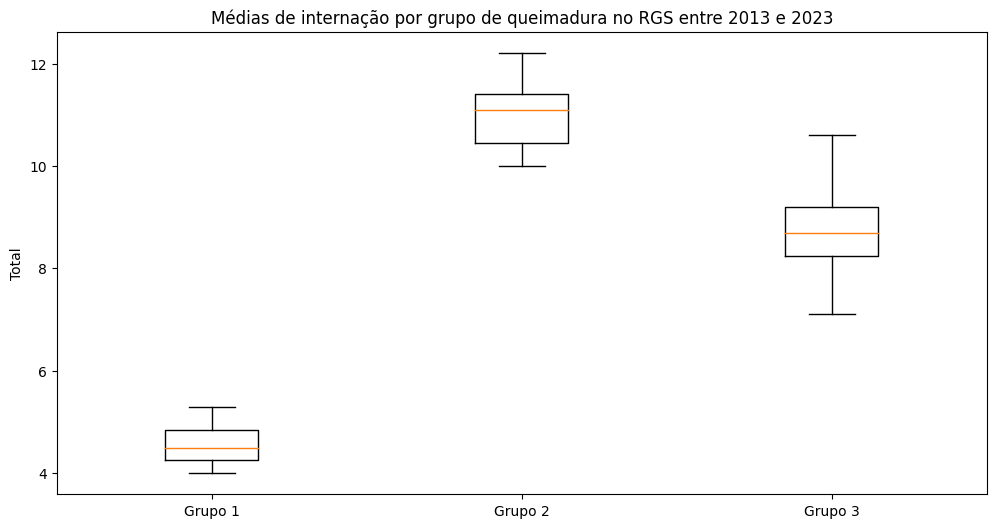

In [295]:
# Extraction of [Total] column from dataframes and creating a new dataframe
total_df1 = tm_int1['Total']
total_df2 = tm_int2['Total']
total_df3 = tm_int3['Total']
dataframe4 = [total_df1, total_df2, total_df3]

plt.figure(figsize=(12, 6))
plt.boxplot(dataframe4, labels=['Grupo 1', 'Grupo 2', 'Grupo 3'])
plt.ylabel('Total')
plt.title('Médias de internação por grupo de queimadura no RGS entre 2013 e 2023')

plt.show()

*In the boxplot graph above, group 2 has the highest average time of hospitalization. The median is shifted to the right, depicting a positive assymetric distribution of data. The group 1 has the shortest average length of stay,with median shifted to the left, showing a negative assymetric distribution; followed by group 3 (simetric distribution).

In [296]:
tm_all = pd.read_csv('/content/TM_all - sih_cnv_firs151016189_6_236_14.csv')

In [297]:
tm_all.head()

,Regiao,Total
0,43001 regiao 01 Verdes Campos,5.3
1,43002 regiao 02 Entre Rios,3.7
2,43003 regiao 03 Fronteira Oeste,5.6
3,43004 regiao 04 Belas Praias,3.4
4,43005 regiao 05 Bons Ventos,4.5


In [298]:
tm_all.tail()

,Regiao,Total
25,43026 regiao 26 Uva Vale,3.6
26,43027 regiao 27 Jacui Centro,3.1
27,43028 regiao 28 Vinte e Oito,3.2
28,43029 regiao 29 Vales e Montanhas,3.4
29,43030 regiao 30 Vale da Luz,6.1


In [299]:
tm_all.dtypes

Regiao     object
Total     float64
dtype: object

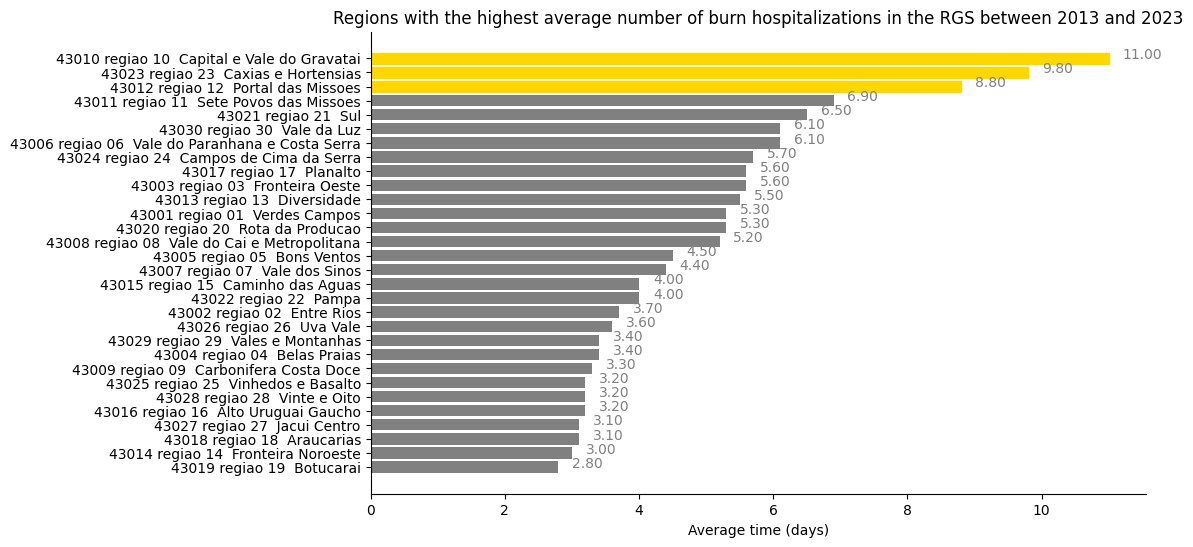

In [300]:
# Horizontal bar graph to demonstrate the largest times of hospitalization by region

# Sorting in descending order by column [Total]
tm_all = tm_all.sort_values(by='Total', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(tm_all['Regiao'], tm_all['Total'], color='gray')

plt.xlabel('Average time (days)')
plt.title('Regions with the highest average number of burn hospitalizations in the RGS between 2013 and 2023')

for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width:.2f}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(10, 0),
                 textcoords='offset points', fontsize=10, color='gray')

# Searching for top 3 values and highligth
tm_top3 = tm_all.tail(3)
for i in range(len(bars)):
    if tm_all['Total'].iloc[i] in tm_top3['Total'].values:
        bars[i].set_color('gold')

tm_all = plt.gca()
tm_all.spines['top'].set_visible(False)
tm_all.spines['right'].set_visible(False)
plt.show()

##**7) Communication and Action**


In [301]:
import pandas as pd
data = {
    'Communication': ['Regional, cultural, environmental and labor characteristics', 'Underreported or unreported data, and still subject to failures in DATASUS', 'In-depth investigation into the increase in prevalence'],
    'Action': ['Education in primary care in the identified profile, acting as prevention', 'Training and education of professionals on data filling', 'Investment in new studies, investigation and changes in data recording. For example, including the body surface area burned in DATASUS'],
}

df = pd.DataFrame(data)

df_dictionary = (
    df.style
    .hide_index()
    .set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', 'lightgray'), ('color', 'black')]},
        {'selector': 'tbody td', 'props': [('background-color', 'whitesmoke'), ('color', 'black')]},
        {'selector': 'tbody tr:hover td', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
        {'selector': 'caption', 'props': [('caption-side', 'bottom')]}
])
)

df_dictionary


<ipython-input-301-63ec5fec5653>:11: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()


Communication,Action
"Regional, cultural, environmental and labor characteristics","Education in primary care in the identified profile, acting as prevention"
"Underreported or unreported data, and still subject to failures in DATASUS",Training and education of professionals on data filling
In-depth investigation into the increase in prevalence,"Investment in new studies, investigation and changes in data recording. For example, including the body surface area burned in DATASUS"


#References



###Data Analysis Phyton
1. https://pandas.pydata.org/docs/user_guide/timeseries.html
2. https://pandas.pydata.org/docs/user_guide/visualization.html
3. https://pandas.pydata.org/docs/user_guide/style.html
4. https://pandas.pydata.org/docs/user_guide/basics.html
5. https://numpy.org/numpy-tutorials/features.html
6. https://matplotlib.org/stable/index.html
7. [ChatGPT](https://https://chat.openai.com/)

###About Burn Pacients
1. AMERICAN BURN ASSOCIATION. Annual Report - 22 Edition. Disponível em: https://ameriburn.org/wp-content/uploads/2023/04/final-4.5.23.pdf. Acesso em: 2 de ago. 2022.
2. Lopes AP, Pessoa LD, Oliveira TRS. Séries temporais de vítimas de queimaduras atendidas no Centro-Oeste e Nordeste do Brasil. Rev Bras Queimaduras 2019;18:27-32.
3. Brasil. Ministério da Saúde. CONITEC. Relatório de Recomendação. 2018. Disponível em:  http://conitec.gov.br/images/Relatorios/2018/Relatorio_CurativoBiocelulose.pdf).
4. Brasil. Ministério da Saúde. Óbitos por queimaduras no Brasil: análise inicial dos dados do Sistema de Informações sobre Mortalidade, 2015 a 2020. Boletim Epidemiológico 2022;53:40-48.
5. Fontana TS, Lopes LV, Linch GFC, Paz AA, Souza EN. Queimaduras no Brasil: Análise retrospectiva de internações e mortalidade. Rev Bras Queimaduras 2020;19:65-71.
6. Oliveira Z D, Santana D R, Mercês M C, Cerqueira M M B F. Avaliação epidemiológica da morbimortalidade por queimaduras na Região Nordeste do Brasil, no período de 2008 A 2017.Int J Develop Res 2020;10:39499-39505.
7. Al-Shaqsi S, Al-Busaidi S, Al-Kashmiri A, Alaraimi R, Al-Buloushi T. Epidemiology of Burn in Sultanate of Oman. World J Plast Surg 2016;5:2-7.
8. Cheng W, Shen C, Zhao D, Zhang H, Tu J, Yuan Z, et al. With the Epidemiological Study Group of Burns. The epidemiology and prognosis of patients with massive burns: A multicenter study of 2483 cases. Burns 2019;45:705-16.
9. Brasil. Ministério da Saúde. Secretaria de Vigilância em Saúde. Departamento de Análise em Saúde e Vigilância de Doenças Não Transmissíveis. Viva Inquérito 2017: Vigilância de Violências e Acidentes em Serviços Sentinelas de Urgência e Emergência – Capitais e Municípios / Ministério da Saúde, Secretaria de Vigilância em Saúde, Departamento de Análise em Saúde e Vigilância de Doenças Não Transmissíveis. – Brasília : Ministério da Saúde, 2019.
10. Freire, Sofia Dantas Moraes et al. Perfil epidemiológico das vítimas de queimadura por macrorregiões no brasil no período de 2018 a 2022. In: XIII CONGRESSO BRASILEIRO DE QUEIMADURAS, n.  8. 2023, Salvador.

